In [99]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

In [100]:
pro1 = pd.read_csv('/Users/Apple/Downloads/All_processed_data/ALS_Proact_Data_after_EDA_clinical_clustering_and_trial_groups.csv')
pro1.head(3)

,subject_id,Event,Age,Sex,Height,Weight,Onset_site,Riluzole_use,Study_Arm,European,Disease_Duration,Stage,Trial_Onset,ALSFRS_RT,ALSFRS_Rasch,Diagnosis_delay,Predicted_FVC,Actual_FVC,Vital_Capacity,slope,TRICALS,TRICALS_eligible,TRICALS_risk_cluster,AgeCluster,DataCluster,Age.,Height.,Weight.,ALSFRS_RT.,ALSFRS_Rasch.,Diagnosis_delay.,Predicted_FVC.,Actual_FVC.,Trial_Onset.,TRICALS.,rough_group,rough_group2,gmm_group,gmm_group2,latent_group,trial_group
0,121,1,52.00,Female,173.000,74.600,limb,Yes,Active,1.0,31.849540,4,17.557162,27.0,21.1,10.607096,5.108100,3.22,63.037137,-0.659350,-4.184806,eligible,0.0,1,0,-10.00,7.900,9.769,4.0,1.9,-1.003942,0.600200,0.183964,6.701708,-0.449482,Medium,2.0,0,2,0,Trial_18mo
1,226,1,72.00,Male,174.000,71.500,bulbar,Yes,Active,1.0,29.113666,4,13.910644,26.0,20.6,11.320302,4.570600,2.57,56.228941,-0.755659,-3.279029,eligible,0.0,0,1,10.00,8.900,6.669,3.0,1.4,-0.290736,0.062700,-0.466036,3.055191,0.456295,Medium,2.0,0,2,0,Trial_18mo
2,624,1,65.14,Female,164.073,64.831,limb,Yes,Active,1.0,28.748357,4,11.643890,23.0,19.2,14.095926,4.309306,1.63,37.825112,-0.869615,-3.282845,eligible,0.0,0,0,3.14,-1.027,0.000,0.0,0.0,2.484888,-0.198594,-1.406036,0.788436,0.452479,Medium,2.0,0,2,0,Trial_12mo


In [101]:
# pro1.columns

In [102]:
pro = pro1[['subject_id', 'Event', 'Age', 'Sex', 'Onset_site','Riluzole_use', 'Study_Arm', 'European',
             'Trial_Onset', 'ALSFRS_Rasch', 'Diagnosis_delay','Vital_Capacity', 'TRICALS', 'trial_group']]

In [103]:
pro['European'] = pro['European'].astype('int')

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_38263/3216276113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro['European'] = pro['European'].astype('int')


In [104]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       4620 non-null   int64  
 1   Event            4620 non-null   int64  
 2   Age              4620 non-null   float64
 3   Sex              4620 non-null   object 
 4   Onset_site       4620 non-null   object 
 5   Riluzole_use     4620 non-null   object 
 6   Study_Arm        4620 non-null   object 
 7   European         4620 non-null   int64  
 8   Trial_Onset      4620 non-null   float64
 9   ALSFRS_Rasch     4620 non-null   float64
 10  Diagnosis_delay  4620 non-null   float64
 11  Vital_Capacity   4620 non-null   float64
 12  TRICALS          4620 non-null   float64
 13  trial_group      4620 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 505.4+ KB


In [105]:
pro['Agec'] = (pro['Age'] - pro['Age'].mean()) / pro['Age'].std()
pro['ALSFRS_Raschc'] = (pro['ALSFRS_Rasch'] - pro['ALSFRS_Rasch'].mean()) / pro['ALSFRS_Rasch'].std()
pro['TRICALSc'] = (pro['TRICALS'] - pro['TRICALS'].mean()) / pro['TRICALS'].std()

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_38263/3698046418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro['Agec'] = (pro['Age'] - pro['Age'].mean()) / pro['Age'].std()
/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_38263/3698046418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro['ALSFRS_Raschc'] = (pro['ALSFRS_Rasch'] - pro['ALSFRS_Rasch'].mean()) / pro['ALSFRS_Rasch'].std()
/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_38263/3698046418.py:3: Settin

In [106]:
pro['Diagnosis_delayc'] = np.log1p(pro['Diagnosis_delay'])
pro['Vital_Capacityc'] = np.log(pro['Vital_Capacity'])

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_38263/4005291742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro['Diagnosis_delayc'] = np.log1p(pro['Diagnosis_delay'])
/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_38263/4005291742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro['Vital_Capacityc'] = np.log(pro['Vital_Capacity'])


In [107]:
# Identify categorical columns
cat_cols = ['Onset_site', 'Riluzole_use', 'European', 'Sex', 'Study_Arm']  # replace with your actual categorical columns

# One-hot encode
df_onehot = pd.get_dummies(pro, columns=cat_cols, drop_first=True)

df_onehot.columns

Index(['subject_id', 'Event', 'Age', 'Trial_Onset', 'ALSFRS_Rasch',
       'Diagnosis_delay', 'Vital_Capacity', 'TRICALS', 'trial_group', 'Agec',
       'ALSFRS_Raschc', 'TRICALSc', 'Diagnosis_delayc', 'Vital_Capacityc',
       'Onset_site_limb', 'Riluzole_use_Yes', 'European_1', 'Sex_Male',
       'Study_Arm_Placebo'],
      dtype='object')

In [108]:
df_onehot['Onset_site_limb'] = df_onehot['Onset_site_limb'].astype(int)
df_onehot['Riluzole_use_Yes'] = df_onehot['Riluzole_use_Yes'].astype(int)
df_onehot['European_1'] = df_onehot['European_1'].astype(int)
df_onehot['Sex_Male'] = df_onehot['Sex_Male'].astype(int)
df_onehot['Study_Arm_Placebo'] = df_onehot['Study_Arm_Placebo'].astype(int)

In [109]:
# Create interactions
df_onehot['Sex_onset_limb'] = df_onehot['Sex_Male']*df_onehot['Onset_site_limb']
df_onehot['Age_onset_limb'] = df_onehot['Agec']*df_onehot['Onset_site_limb']
df_onehot['Sex_Riluzole'] = df_onehot['Sex_Male']*df_onehot['Riluzole_use_Yes']
df_onehot['Age_Riluzole'] = df_onehot['Agec']*df_onehot['Riluzole_use_Yes']
df_onehot['Trical_Riluzole'] = df_onehot['TRICALSc']*df_onehot['Riluzole_use_Yes']

In [110]:
df_onehot.head(3)

,subject_id,Event,Age,Trial_Onset,ALSFRS_Rasch,Diagnosis_delay,Vital_Capacity,TRICALS,trial_group,Agec,ALSFRS_Raschc,TRICALSc,Diagnosis_delayc,Vital_Capacityc,Onset_site_limb,Riluzole_use_Yes,European_1,Sex_Male,Study_Arm_Placebo,Sex_onset_limb,Age_onset_limb,Sex_Riluzole,Age_Riluzole,Trical_Riluzole
0,121,1,52.00,17.557162,21.1,10.607096,63.037137,-4.184806,Trial_18mo,-0.821409,0.302248,-0.367946,2.451617,4.143724,1,1,1,0,0,0,-0.821409,0,-0.821409,-0.367946
1,226,1,72.00,13.910644,20.6,11.320302,56.228941,-3.279029,Trial_18mo,1.285900,0.181267,0.498977,2.511248,4.029432,0,1,1,1,0,0,0.000000,1,1.285900,0.498977
2,624,1,65.14,11.643890,19.2,14.095926,37.825112,-3.282845,Trial_12mo,0.563093,-0.157479,0.495325,2.714425,3.632973,1,1,1,0,0,0,0.563093,0,0.563093,0.495325


In [111]:
df = df_onehot.copy()

In [112]:
df.columns

Index(['subject_id', 'Event', 'Age', 'Trial_Onset', 'ALSFRS_Rasch',
       'Diagnosis_delay', 'Vital_Capacity', 'TRICALS', 'trial_group', 'Agec',
       'ALSFRS_Raschc', 'TRICALSc', 'Diagnosis_delayc', 'Vital_Capacityc',
       'Onset_site_limb', 'Riluzole_use_Yes', 'European_1', 'Sex_Male',
       'Study_Arm_Placebo', 'Sex_onset_limb', 'Age_onset_limb', 'Sex_Riluzole',
       'Age_Riluzole', 'Trical_Riluzole'],
      dtype='object')

In [113]:
df = df[['subject_id', 'Event',  'Trial_Onset','trial_group', 'Agec',
       'ALSFRS_Raschc', 'TRICALSc', 'Diagnosis_delayc', 'Vital_Capacityc',
       'Onset_site_limb', 'Riluzole_use_Yes', 'European_1', 'Sex_Male',
       'Study_Arm_Placebo', 'Sex_onset_limb', 'Age_onset_limb', 'Sex_Riluzole',
       'Age_Riluzole', 'Trical_Riluzole']]

In [114]:
df6 = df[df['trial_group'] == 'Trial_6mo']
df6 = df6.drop(columns=['trial_group', 'subject_id'])

df9 = df[df['trial_group'] == 'Trial_9mo']
df9 = df9.drop(columns=['trial_group', 'subject_id'])

df12 = df[df['trial_group'] == 'Trial_12mo']
df12 = df12.drop(columns=['trial_group', 'subject_id'])

df18 = df[df['trial_group'] == 'Trial_18mo']
df18 = df18.drop(columns=['trial_group', 'subject_id'])

dflo = df[df['trial_group'] == 'Trial_longer']
dflo = dflo.drop(columns=['trial_group', 'subject_id'])

dflo.head(3)

,Event,Trial_Onset,Agec,ALSFRS_Raschc,TRICALSc,Diagnosis_delayc,Vital_Capacityc,Onset_site_limb,Riluzole_use_Yes,European_1,Sex_Male,Study_Arm_Placebo,Sex_onset_limb,Age_onset_limb,Sex_Riluzole,Age_Riluzole,Trical_Riluzole
5,1,30.402102,0.440553,-1.488270,1.160619,1.403556,4.468557,1,1,1,1,0,1,0.440553,1,0.440553,1.160619
10,1,29.350854,0.126880,0.689387,-0.418652,2.565354,4.017024,0,0,1,0,1,0,0.000000,0,0.000000,-0.000000
22,0,26.000000,-0.189216,-0.157479,0.211828,2.200577,4.146942,1,1,1,0,1,0,-0.189216,0,-0.189216,0.211828


In [ ]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt
import numpy as np
import os


def backward_elimination_cox(df, duration_col="time", event_col="event", p_threshold=0.05):
    """
    Perform backward elimination for a Cox model using p-values.
    Returns fitted model and retained features.
    """
    features = [col for col in df.columns if col not in [duration_col, event_col]]
    df_model = df.copy()

    while True:
        cph = CoxPHFitter()
        cph.fit(df_model, duration_col=duration_col, event_col=event_col)
        pvals = cph.summary["p"]
        max_p = pvals.max()

        if max_p > p_threshold:
            worst_feature = pvals.idxmax()
            df_model = df_model.drop(columns=[worst_feature])
        else:
            break

        # Stop if only duration/event left
        if len(df_model.columns) <= 2:
            break

    final_features = [col for col in df_model.columns if col not in [duration_col, event_col]]
    return cph, final_features



In [116]:

def cross_validate_cox_backward(
    datasets,
    duration_col="time",
    event_col="event",
    p_threshold=0.05,
    output_dir="cox_fold_summaries"
):
    """
    Leave-one-dataset-out CV for Cox model with backward elimination.
    Saves per-fold model summaries as CSVs.

    Parameters
    ----------
    datasets : list of pd.DataFrame
        List of datasets.
    duration_col : str, default='time'
        Column for duration/time.
    event_col : str, default='event'
        Column for event indicator.
    p_threshold : float, default=0.05
        P-value cutoff for backward elimination.
    output_dir : str, default='cox_fold_summaries'
        Directory where fold summaries (CSVs) will be saved.

    Returns
    -------
    results_df : pd.DataFrame
        C-index per fold and mean.
    models : list
        List of fitted CoxPHFitter models.
    features_per_fold : dict
        Mapping of fold -> selected features.
    coef_summary : pd.DataFrame
        Coefficients across folds (NaN where excluded).
    """

    os.makedirs(output_dir, exist_ok=True)

    results = []
    models = []
    features_per_fold = {}
    coef_dfs = []

    for i in range(len(datasets)):
        print(f"\n=== Fold {i+1} ===")
        train_dfs = [df for j, df in enumerate(datasets) if j != i]
        train_df = pd.concat(train_dfs, ignore_index=True)
        test_df = datasets[i]

        # Fit model using backward elimination
        model, selected_features = backward_elimination_cox(
            train_df,
            duration_col=duration_col,
            event_col=event_col,
            p_threshold=p_threshold
        )

        print(f"Selected features (Fold {i+1}): {selected_features}")

        # Evaluate on test set
        test_pred = model.predict_partial_hazard(
            test_df[selected_features + [duration_col, event_col]]
        )
        cindex = concordance_index(
            test_df[duration_col], -test_pred, test_df[event_col]
        )

        results.append({
            "fold": i + 1,
            "concordance_index": cindex
        })
        models.append(model)
        features_per_fold[f"fold_{i+1}"] = selected_features

        # Store coefficient summary
        coef = model.params_.rename(f"fold_{i+1}")
        coef_dfs.append(coef.to_frame())

        # ✅ Save model summary as CSV
        summary_csv_path = os.path.join(output_dir, f"cox_fold_{i+1}_summary.csv")
        model.summary.to_csv(summary_csv_path, index=True)
        print(f"Model summary saved → {summary_csv_path}")

    # Build results table
    results_df = pd.DataFrame(results)
    results_df.loc["Mean"] = ["Mean", results_df["concordance_index"].mean()]

    # Combine coefficients
    coef_summary = pd.concat(coef_dfs, axis=1)
    coef_summary["mean_coef"] = coef_summary.mean(axis=1)
    coef_summary["std_coef"] = coef_summary.std(axis=1)

    return results_df, models, features_per_fold, coef_summary


In [117]:
# Suppose you have 5 datasets: df1, df2, df3, df4, df5
datasets = [df6, df9, df12, df18, dflo]

cv_results, fitted_models, features_per_fold, coef_summary = cross_validate_cox_backward(
    datasets,
    duration_col="Trial_Onset",
    event_col="Event",
    p_threshold=0.05,
    output_dir="cox_models_cv"
)

print("\nCross-validation results:")
print(cv_results)

print("\nSelected features per fold:")
for fold, feats in features_per_fold.items():
    print(f"{fold}: {feats}")

print("\nCoefficient summary:")
print(coef_summary.head())



=== Fold 1 ===
Selected features (Fold 1): ['Agec', 'ALSFRS_Raschc', 'TRICALSc', 'Diagnosis_delayc', 'Vital_Capacityc', 'Onset_site_limb', 'European_1']
Model summary saved → cox_models_cv/cox_fold_1_summary.csv

=== Fold 2 ===
Selected features (Fold 2): ['Agec', 'ALSFRS_Raschc', 'TRICALSc', 'Diagnosis_delayc', 'Vital_Capacityc', 'Onset_site_limb', 'Riluzole_use_Yes', 'European_1', 'Sex_Riluzole', 'Age_Riluzole']
Model summary saved → cox_models_cv/cox_fold_2_summary.csv

=== Fold 3 ===
Selected features (Fold 3): ['Agec', 'ALSFRS_Raschc', 'TRICALSc', 'Diagnosis_delayc', 'Vital_Capacityc', 'Onset_site_limb', 'Riluzole_use_Yes', 'European_1', 'Age_Riluzole']
Model summary saved → cox_models_cv/cox_fold_3_summary.csv

=== Fold 4 ===
Selected features (Fold 4): ['Agec', 'ALSFRS_Raschc', 'TRICALSc', 'Diagnosis_delayc', 'Vital_Capacityc', 'Onset_site_limb', 'European_1', 'Sex_Riluzole', 'Age_Riluzole']
Model summary saved → cox_models_cv/cox_fold_4_summary.csv

=== Fold 5 ===
Selected fea

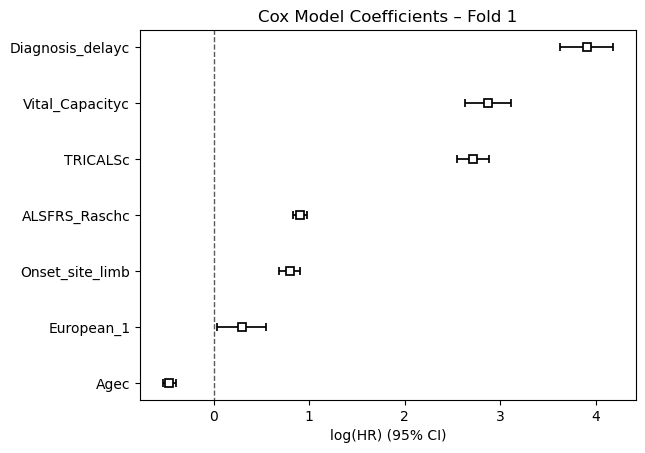

In [126]:
# Pick a fold (e.g., Fold 1)
fold_index = 0  # 0 = first fold
model = fitted_models[fold_index]

# Simple coefficient plot
model.plot()
plt.title(f"Cox Model Coefficients – Fold {fold_index + 1}")
plt.show()


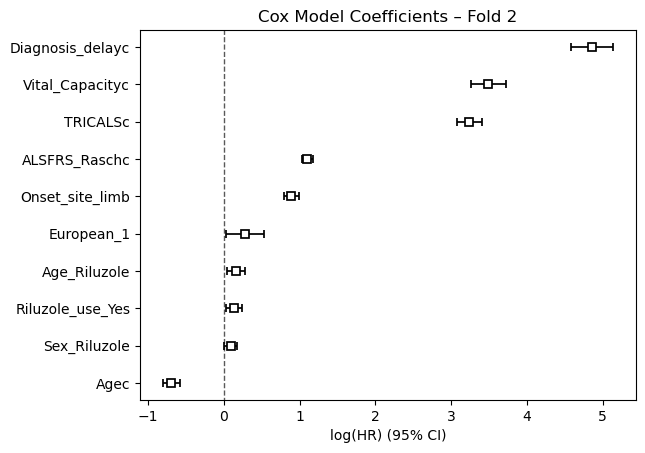

In [127]:
# Pick a fold (e.g., Fold 1)
fold_index = 1  # 0 = first fold
model = fitted_models[fold_index]

# Simple coefficient plot
model.plot()
plt.title(f"Cox Model Coefficients – Fold {fold_index + 1}")
plt.show()

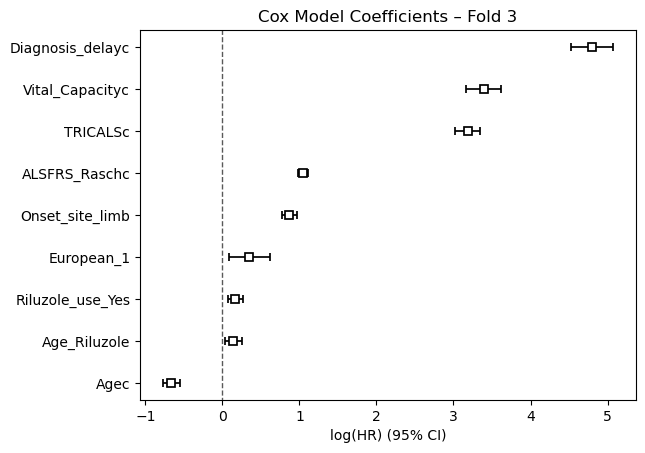

In [128]:
# Pick a fold (e.g., Fold 1)
fold_index = 2  # 0 = first fold
model = fitted_models[fold_index]

# Simple coefficient plot
model.plot()
plt.title(f"Cox Model Coefficients – Fold {fold_index + 1}")
plt.show()

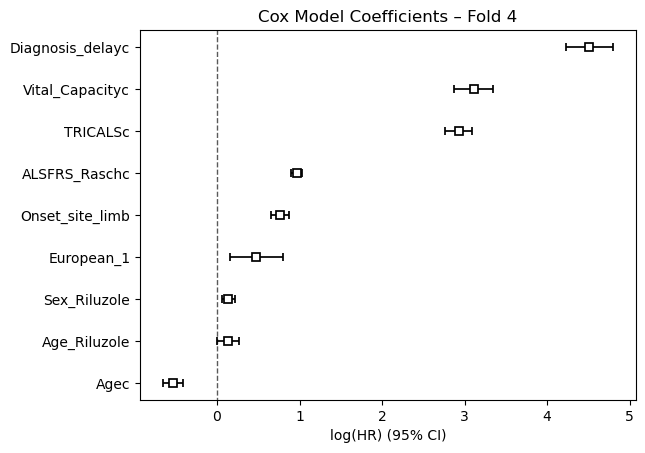

In [129]:
# Pick a fold (e.g., Fold 1)
fold_index = 3  # 0 = first fold
model = fitted_models[fold_index]

# Simple coefficient plot
model.plot()
plt.title(f"Cox Model Coefficients – Fold {fold_index + 1}")
plt.show()

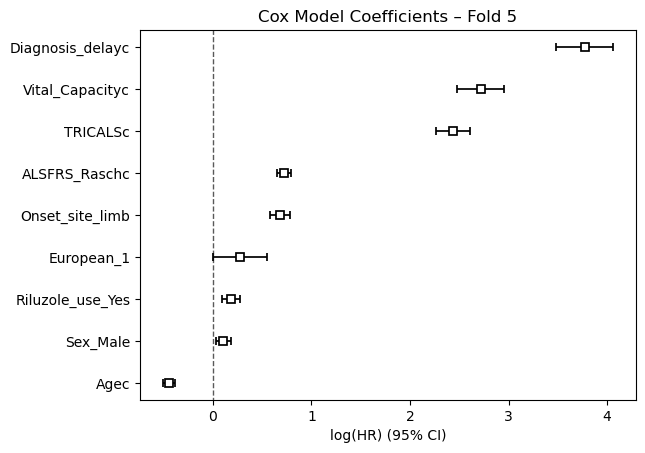

In [130]:
# Pick a fold (e.g., Fold 1)
fold_index = 4  # 0 = first fold
model = fitted_models[fold_index]

# Simple coefficient plot
model.plot()
plt.title(f"Cox Model Coefficients – Fold {fold_index + 1}")
plt.show()

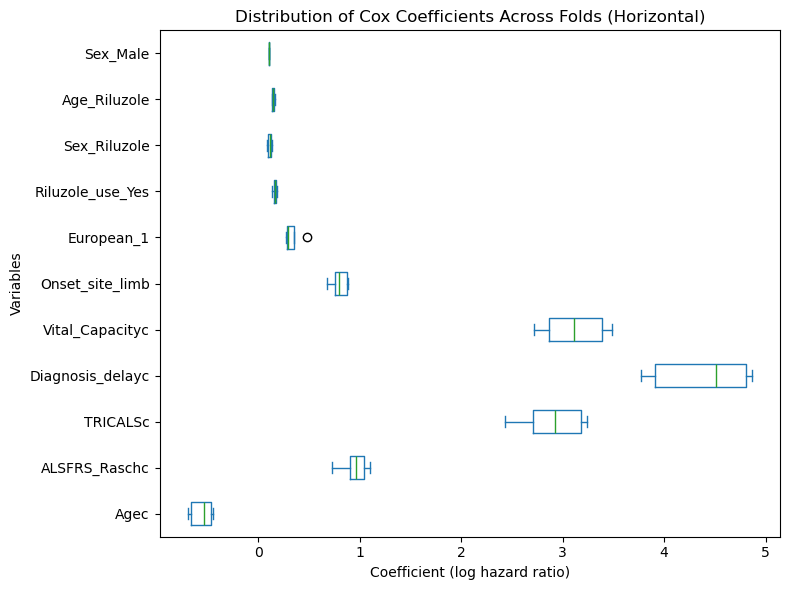

In [ ]:
import matplotlib.pyplot as plt

coef_data = coef_summary.drop(columns=["mean_coef", "std_coef"]).T

coef_data.plot(kind="box", vert=False, figsize=(8, 6))
plt.title("Distribution of Cox Coefficients Across Folds (Horizontal)")
plt.xlabel("Coefficient (log hazard ratio)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()
